<a href="https://colab.research.google.com/github/tasmimjoti/Computer-Vision/blob/main/CIFAR_10_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=69f202dbf3afff402eca8dd728e605dbfc355eaaa3e73d11c5eb38ced607ee06
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [2]:
cifar10 = tf.keras.datasets.cifar10
(xtrain, ytrain),(xtest, ytest) = keras.datasets.cifar10.load_data()
assert xtrain.shape == (50000, 32, 32, 3)
assert xtest.shape == (10000, 32, 32, 3)
assert ytrain.shape == (50000, 1)
assert ytest.shape == (10000, 1)

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
xtrain.shape

(50000, 32, 32, 3)

In [4]:
xtest.shape

(10000, 32, 32, 3)

In [5]:
ytrain.shape

(50000, 1)

In [6]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
ytrain = ytrain.reshape(-1,)
ytrain[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
ytest[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [9]:
ytest = ytest.reshape(-1,)
ytest[:5] #show 0-4 element

array([3, 8, 8, 0, 6], dtype=uint8)

In [10]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

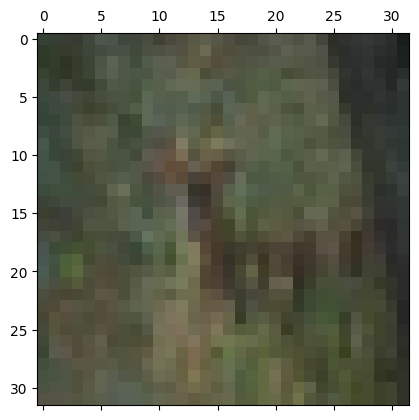

In [11]:
plt.matshow(xtrain[10])

# **Normalizing the training data**

In [12]:
xtest = xtest/255
xtrain = xtrain/255

In [13]:
Xtrain = xtrain[:, :, :, np.newaxis]
Xtrain.shape

(50000, 32, 32, 1, 3)

In [14]:
batch_size = 64

In [15]:
Xtest = xtest[:, :, :, np.newaxis]

In [16]:
input_shape = (batch_size, 32, 32, 3)
model =  tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape = (32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),

  tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [18]:
model.compile(
 optimizer ='adam',
 loss = tf.keras.losses.SparseCategoricalCrossentropy(),
 metrics = ['accuracy']
)

In [19]:
shape_x = xtrain.shape
shape_y = ytrain.shape
print(shape_x)
print(shape_y)

(50000, 32, 32, 3)
(50000,)


In [20]:
history = model.fit(xtrain, ytrain, batch_size = 64, epochs = 10, validation_split = 0.3)

Epoch 1/10
547/547 [==============================] - 68s 122ms/step - loss: 1.5847 - accuracy: 0.4281 - val_loss: 1.3266 - val_accuracy: 0.5222
Epoch 2/10
547/547 [==============================] - 57s 104ms/step - loss: 1.2174 - accuracy: 0.5721 - val_loss: 1.1558 - val_accuracy: 0.5957
Epoch 3/10
547/547 [==============================] - 48s 88ms/step - loss: 1.0819 - accuracy: 0.6196 - val_loss: 1.0841 - val_accuracy: 0.6272
Epoch 4/10
547/547 [==============================] - 47s 86ms/step - loss: 0.9930 - accuracy: 0.6537 - val_loss: 1.0493 - val_accuracy: 0.6333
Epoch 5/10
547/547 [==============================] - 49s 90ms/step - loss: 0.9230 - accuracy: 0.6785 - val_loss: 1.0516 - val_accuracy: 0.6401
Epoch 6/10
547/547 [==============================] - 49s 90ms/step - loss: 0.8677 - accuracy: 0.6961 - val_loss: 0.9888 - val_accuracy: 0.6595
Epoch 7/10
547/547 [==============================] - 46s 85ms/step - loss: 0.8127 - accuracy: 0.7164 - val_loss: 0.9883 - val_accurac

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(xtest)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(ytest, y_pred_classes))

313/313 [==============================] - 4s 13ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.81      0.68      1000
           1       0.85      0.74      0.79      1000
           2       0.61      0.52      0.56      1000
           3       0.54      0.42      0.47      1000
           4       0.66      0.63      0.64      1000
           5       0.66      0.53      0.58      1000
           6       0.72      0.75      0.74      1000
           7       0.72      0.73      0.72      1000
           8       0.72      0.82      0.77      1000
           9       0.68      0.81      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [22]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 4s 12ms/step - loss: 0.9827 - accuracy: 0.6742


[0.9827455282211304, 0.6741999983787537]

In [23]:
y_pred = model.predict(xtest)
y_pred[:5]


313/313 [==============================] - 5s 14ms/step


array([[3.58646299e-04, 3.86577245e-04, 5.12608327e-04, 4.94698346e-01,
        1.24413939e-03, 7.67097203e-03, 4.73459903e-03, 2.35705829e-05,
        4.71751034e-01, 1.86195020e-02],
       [6.19469024e-03, 6.99124634e-02, 8.91963850e-07, 3.20508235e-07,
        7.46887963e-07, 1.32466020e-08, 1.71527873e-07, 6.11072082e-08,
        9.23625171e-01, 2.65547918e-04],
       [1.17621884e-01, 2.56303102e-01, 2.46394426e-04, 7.82076037e-04,
        4.40690201e-03, 4.36086964e-04, 1.09475375e-04, 4.74246358e-03,
        5.86598456e-01, 2.87530590e-02],
       [9.66039598e-01, 9.30560287e-03, 2.20100558e-03, 5.25483629e-04,
        1.52162078e-03, 2.24447631e-05, 9.52357659e-04, 4.02235382e-05,
        1.91533174e-02, 2.38263980e-04],
       [5.64524362e-06, 1.23194448e-04, 8.19067936e-03, 2.88624913e-02,
        6.57271504e-01, 1.25108776e-03, 3.04248095e-01, 9.24252709e-06,
        2.72968337e-05, 1.07148135e-05]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [25]:
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [26]:
def plot_sample(x, y, index):
 plt.figure(figsize = (15, 2))
 plt.imshow(x[index])
 plt.xlabel(classes[y[index]])

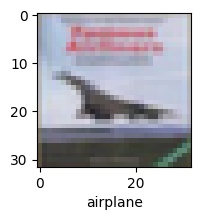

In [27]:
plot_sample(xtest, ytest, 3)

In [28]:
classes[y_classes[3]]

'airplane'

In [29]:
classes[y_classes[3]]

'airplane'